# Import libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df["Dependents"].unique() #EDA 

array(['0', '1', '2', '3+', nan], dtype=object)

# Handling NA values

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Remove all rows with NA values
df=df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

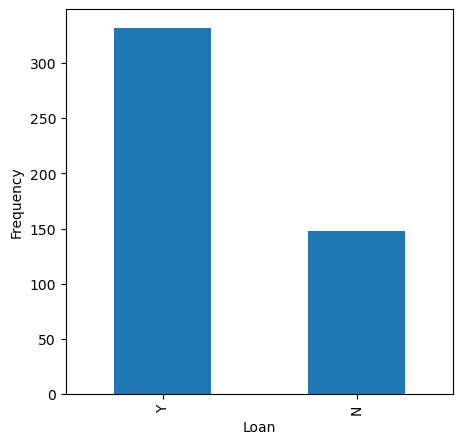

In [8]:
# Count of label
ax = df['Loan_Status'].value_counts().plot(kind='bar', figsize=(5,5))
ax.set_xlabel("Loan")
ax.set_ylabel("Frequency")

In [9]:
df.nunique()

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Preprocessing dataset

Why do we label encode?
Models need an interger/float input. In order to translate categorical string data to integer data, we labelencode the data. Another method is to OneHot encode the data but this increases the number of input feature columns, there by increasing number of features for the model.

In [10]:
#Label encode all categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Property_Area']
for col in df[cat_features]:
    df[col]=le.fit_transform(df[col])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [11]:
df.loc[610,:] # "Dependents" has an entry like "3+" so changing that to another integer, i.e; 3

Loan_ID              LP002979
Gender                      1
Married                     1
Dependents                 3+
Education                   0
Self_Employed               0
ApplicantIncome          4106
CoapplicantIncome         0.0
LoanAmount               40.0
Loan_Amount_Term        180.0
Credit_History            1.0
Property_Area               0
Loan_Status                 1
Name: 610, dtype: object

In [12]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype('int')

In [13]:
# Normalize the table to values between 0 and 1 so that columns with higher values (ApplicantIncome, CoapplicantIncome, 
# LoanAmount, Loan_Amount_Term) don't affect model performance

from sklearn.preprocessing import MinMaxScaler

df_temp=df.drop("Loan_ID", axis=1)
scaler = MinMaxScaler()
names = df_temp.columns
#names.remove("Loan_ID")
d = scaler.fit_transform(df_temp)
scaled_df = pd.DataFrame(d, columns = names)

In [14]:
scaled_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.333333,0.0,0.0,0.054830,0.044567,0.201354,0.72973,1.0,0.0,0.0
1,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.096447,0.72973,1.0,1.0,1.0
2,1.0,1.0,0.000000,1.0,0.0,0.030093,0.069687,0.187817,0.72973,1.0,1.0,1.0
3,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.223350,0.72973,1.0,1.0,1.0
4,1.0,1.0,0.666667,0.0,1.0,0.065145,0.124006,0.436548,0.72973,1.0,1.0,1.0


Note: For this particular dataset, accuracy did not change before and after scaling. Scaling is a good practice to avoid model bias.

In [15]:
# Features and labels
X=scaled_df.drop(["Loan_Status"], axis=1) #features
y=scaled_df["Loan_Status"]


In [16]:
# We are using Random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5)

# Simple approach to K-fold cross validation

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k=10

cv = StratifiedKFold(n_splits=k, random_state=1, shuffle=True)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)

print('Accuracy: %.3f, Standard Deviation: %.3f' % (np.max(scores)*100, np.std(scores)))

Accuracy: 85.417, Standard Deviation: 0.030


In [18]:
scores

array([0.77083333, 0.75      , 0.85416667, 0.8125    , 0.77083333,
       0.79166667, 0.8125    , 0.8125    , 0.8125    , 0.83333333])

In [19]:
# Steps of the cross validation

for i in range (0,k):
    print("Fold Number: %d, Accuracy: %.3f" %(i, scores[i]))
    

Fold Number: 0, Accuracy: 0.771
Fold Number: 1, Accuracy: 0.750
Fold Number: 2, Accuracy: 0.854
Fold Number: 3, Accuracy: 0.812
Fold Number: 4, Accuracy: 0.771
Fold Number: 5, Accuracy: 0.792
Fold Number: 6, Accuracy: 0.812
Fold Number: 7, Accuracy: 0.812
Fold Number: 8, Accuracy: 0.812
Fold Number: 9, Accuracy: 0.833
